##### Libraries

In [1]:
import pandas as pd
import re,string
pd.options.display.max_colwidth = None

##### Load df

In [2]:
df = pd.read_excel('../data_processed/unclean_data.xlsx')

In [3]:
# check is there any null value in dataset
# print(df.isnull().sum())

In [4]:
# # drop empty rows from the 'text' column
# df.dropna(subset=['text'], inplace=True)
# # Remove rows with NaN values
# df.dropna(inplace=True)
# #remove duplicate
# df.drop_duplicates(subset=['text'], inplace=True)
# df[['text']].sample(5)


In [5]:
df.shape

(179121, 5)

In [6]:
df.shape

(179121, 5)

In [7]:
df['text'] = df['text'].astype('str')
df['name'] = df['name'].astype('str')

In [8]:
#single letter
def remove_single_letter(letter):
    text = re.sub(r'\b\w\b', '', letter)
    return text
df['text'] = df['text'].apply(lambda x: remove_single_letter(x))

In [9]:
df[['text']].sample(5)

,text
66862,everyone looks good except with their own afghanistan alas
92176,let people know their morals
17679,RT Graduation ceremony of Women Officers of Afghan National Army. #ANA #Afghanistan
41609,personal screams as result of taliban whipping
29463,RT of Nangarhar University gave an honorary doctorate certificate to the student of Agure Khatak School.


In [10]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date.astype(str)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.strip()

##### The most hashtags

In [11]:
import pandas as pd
import re
# Extract hashtags using regular expression
hashtags = df['text'].apply(lambda x: re.findall(r'#\w+', x))
# Flatten the list of hashtags
hashtags = [tag for sublist in hashtags for tag in sublist]
# Count the frequency of each hashtag
freq = pd.Series(hashtags).value_counts()
# Select the top N most frequent hashtags
top_n = 10
top_hashtags = freq.head(top_n)
# Print the top N most frequent hashtags
print(top_hashtags)


#afghanistan              5224
#taliban                  3457
#rabieh_sadat             1619
#afghanssupporttaliban    1033
#kabul                     929
#unitedafghanistan         829
#stophazaragenocide        757
#afghan                    549
#afghanwomen               509
#pakistan                  483
dtype: int64


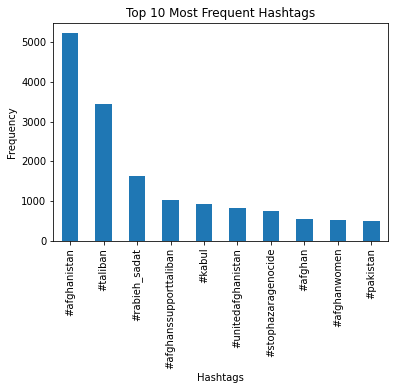

In [12]:
# Visualize the top N most frequent hashtags
import matplotlib.pyplot as plt
top_hashtags.plot(kind='bar', rot=0)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top {} Most Frequent Hashtags'.format(top_n))
plt.show()

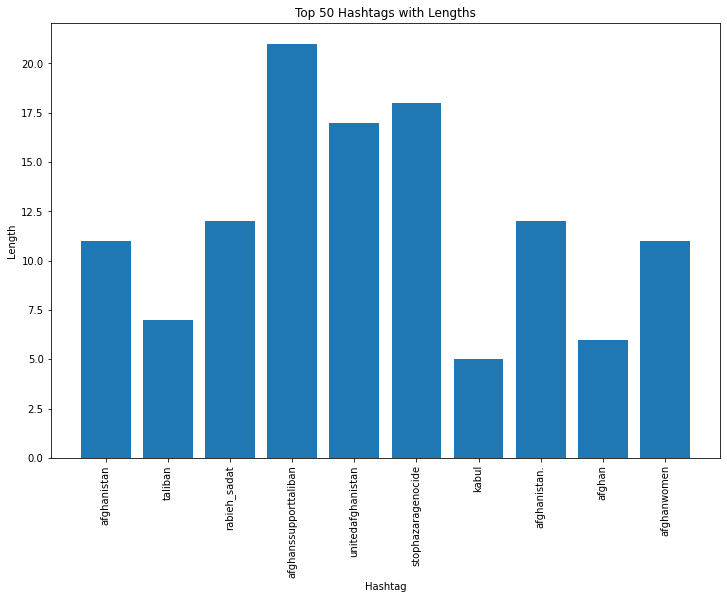

In [13]:
from collections import Counter
hashtags = []
for row in df['text']:
    hashtags.extend([tag.strip("#") for tag in row.split() if tag.startswith("#")])
counts = Counter(hashtags)
top_tags = counts.most_common(10)  # modify topn parameter here
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar([tag[0] for tag in top_tags], [len(tag[0]) for tag in top_tags])
ax.set_title("Top 50 Hashtags with Lengths")
ax.set_xlabel("Hashtag")
ax.set_ylabel("Length")
plt.xticks(rotation=90)
plt.show()

In [14]:
# # 10 most repeated tweets
# df.groupby(['text']).size().reset_index(name='counts')\
#   .sort_values('counts', ascending=False).head(10)

In [15]:
words_to_drop = ['corona', 'iran', 'tehran', 
                 'money', 'thanks', 'thank you', 'how are you', 'hi', 'hello', 
                 'soul']
for word in words_to_drop:
    df = df[~df['text'].str.contains(word, case=False, na=False)]
df.dropna(subset=['text'], inplace=True) #remove nan value
df.drop_duplicates(subset=['text'], inplace=True)

##### Clean text

In [16]:
def clean_text(text):
    text = re.sub(r'\bRT\b', '',str(text))
    # remove mentions (@)
    text = re.sub(r'@\w+', '', str(text))
    # remove URLs (http and https)
    text = re.sub(r'http\S+|https\S+', '', str(text))
    # remove links (www)
    text = re.sub(r'www.\S+', '', str(text))
    # remove non-alphanumeric characters and whitespace
    text = re.sub(r'[^\w\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text))
    # convert to lowercase
    text = text.lower()
    # remove leading and trailing whitespace
    text = text.strip()
    return text 

# remove new line
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].apply(clean_text)

In [17]:
df[['text']].sample(5)

,text
24360,policy to encourage more suicides donotrecognizetaliban
3557,then focus on initiatives that actually are focusing on girls education stop expressing shocks and disappointments
124496,there are many women in afghanistan and iraq who could have also shared their own experiences would be great if you give space to women from these countries they have countless experiences of course huge respect to long ti ame friend and colleague
73156,dr abdullah and do not want to be in the government says former afghanistan president we have had our ti ame we have done our pa for the country so there is no need for us in the government and we should not be in any government that comes into the future
136827,to day afggerman chamber of commerce council officially launched to create more opportunities for trade industry on both sidesto day germany is the most sustainable economic model across the globe our commercial relation with germany has more strategic economic amplications


##### Remove punctuations

In [18]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
df['text'] = df['text'].apply(remove_punctuations)

In [19]:
df[['text']].sample(10)

,text
165106,was pleasure for me our team members to meet amb alice wells on her visit to kabul we discussed latest progress in peace process exchanged views on upcoming elections as well as other current issues told her appreciated us suppo for the afghan electoral process
126643,happy national journalists day to all committed and worthy journalists journalists especially female journalists in afghanistan have always facedare facing many challenges insecurity targeted assassinations and violence against journalists have caused large number of journalists to leave the country and their profession
115054,we want peace and we want pen instead of gun please help us in the education sector providing any opportunity for
25801,penpath volunteers embarked on trip to nangarhar province to start their door to door campaign for education and
166039,mr idrissov said in the near future kazakhstan would become the head of the unsc sanctions committee and would suppo afg request
155231,subsequent stages of the peace process
119183,tell the women and girls of afghanistan that we refuse to leave them alone as collateral damage
151585,sediq seddiqi former spokesperson of the ministry of interiortaliban fought with america for 20 years under the name of jihad now they are asking america for helpafghanistan
21250,rt these the new taliban the ones peace asserts to have evolved to normal human beings taliban punish
40239,rt when imām alī ibn abī ṭālib met with the paternal grandfather of abū ḥanīfa the sassanian marzban of kabul the latt


In [20]:
def remove_non_ascii(df, column_name):
    # iterate over each row in the specified column
    for index, row in df.iterrows():
        if isinstance(row[column_name], str):
            # encode the text as ASCII, ignoring any non-ASCII characters
            text = row[column_name].encode('ascii', 'ignore').decode()
        # update the dfframe with the modified text
            df.at[index, column_name] = text
    return df
df = remove_non_ascii(df, 'name')
df = remove_non_ascii(df, 'text')


In [21]:
#remove 1,2,3 words from tweets, such as interesting article, Afghan girl... 
def remove_two_word_rows(df, column_name):
    # get the index of rows with two-word values in the specified column
    two_word_rows = df[df[column_name].str.split().str.len() == 3].index
    # drop the two-word rows from the dfframe
    df = df.drop(two_word_rows, axis=0)
    return df
df = remove_two_word_rows(df, 'text')


In [22]:
df.shape

(87255, 5)

In [23]:
# df.to_excel('../data_processed/clean.xlsx', index=False)